<a href="https://colab.research.google.com/github/inuin09/DeepLearning/blob/main/%EC%8B%A0%EA%B2%BD%EB%A7%9D_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**학습이란,**
훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 뜻함

**손실 함수란,**
신경망이 학습할 수 있도록 해주는 지표임<br>
이 손실 함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표임

## 4.1 데이터에서 학습한다!
이번 장에서는 신경망 학습(데이터로부터 매개변수의 값을 정하는 방법)에 대해서 설명하고, 파이썬으로 MNIST 데이터셋의 손글씨 숫자를 학습하는 코드를 구현함.

### 4.1.1 데이터 주도 학습
[그림 4-1]과 같은 자유분방한 손글씨 이미지를 보고 5인지 아닌지를 알아보는 프로그램을 구현하는 것이 목표임.

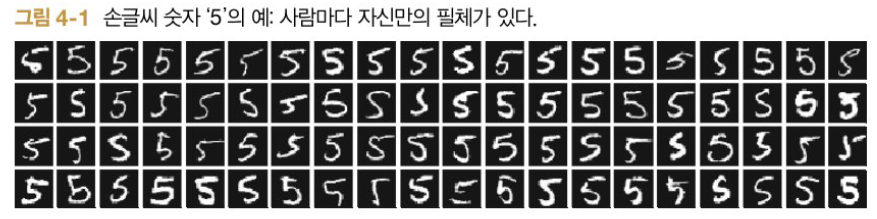

위와 같이 이미지에서 특징을 추출하고 그 특징의 패턴을 머신러닝 기술로 학습하는 방법이 있음.<br>
여기서 말하는 특징은 입력 데이터(입력 이미지)에서 본질적인 데이터(중요한 데이터)를 정확하게 추출할 수 있도록 설계된 변환기를 가리킴.<br>
이미지의 특징은 보통 벡터로 기술하고, 컴퓨터 비전 분야에서는 SIFT, SURF, HOG 등의 특징을 많이 사용함<br>
이런 특징을 사용하여 이미지 데이터를 벡터로 변환하고, 변환된 벡터를 가지고 지도 학습 방식의 대표 분류 기법인 SVM, KNN 등으로 학습할 수 있음<br>

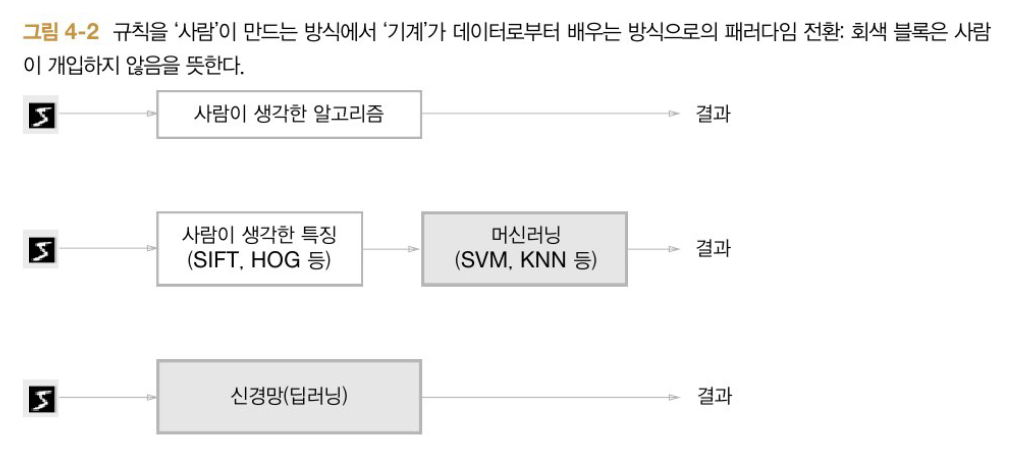
- 기계와 사람이 함께 작용: [그림 4-2]의 중간과 같음
- 신경망(딥러닝) 방식: [그림 4-2]의 아래 (사람이 개입하지 않는 블록 하나로 그려짐)

[그림 4-2]와 같이 신경망은 이미지를 "있는 그대로" 학습함<br>
두 번째 접근 방식(특징과 머신러닝 방식)에서는 특징을 사람이 설계했지만, 신경망은 이미지에 포함된 중요한 특징까지도 '기계'가 스스로 학습할 것임.

- 신경망의 이점: 모든 문제를 같은 맥락에서 풀 수 있음

예를 들어, '5'를 인식하는 문제든, '개'를 인식하는 문제든, 아니면 '사람의 얼굴'을 인식하는 문제든, 세부사항과 관계없이 신경망은 주어진 데이터를 온전히 학습하고 주어진 문제의 패턴을 발견하려 시도함.<br>
즉, 신경망은 모든 문제를 주어진 데이터 그대로를 입력 데이터로 활용해 'end-to-end'로 학습할 수 있음.

### 4.1.2 훈련 데이터와 시험 데이터

- 머신러닝 문제는 데이터를 'training data'와 'test data'로 나눠 학습과 실험을 수행하는 것이 일반적임
- 우선 훈련 데이터만 사용하여 학습하면서 최적의 매개변수를 찾음
- 그런 다음, 시험 데이터를 사용하여 앞서 훈련한 모델의 실력을 평가함

*training data와 test data로 나누는 이유*<br>
: 범용적으로 사용할 수 있는 모델을 원하기 때문<br>
: 이 범용 능력을 제대로 평가하기 위해 training data와 test data를 분리함<br>

- 범용 능력은 아직 보지 못한 데이터 (훈련 데이터에 포함되지 않는 데이터)로도 문제를 올바르게 풀어내는 능력임
- 데이터셋 하나로만 매개변수의 학습과 평가를 수행하면 올바른 평가가 될 수 없음

**과대적합(overfitting)**<br>
한 데이터셋에만 지나치게 최적화된 상태

## 4.2 손실 함수

: 신경망 학습에서는 현재의 상태를 '하나의 지표'로 표현함<br>
: 그리고 그 지표를 가장 좋게 만들어주는 가중치 매개변수의 값을 탐색하는 것임<br>
: 신경망은 '하나의 지표'를 기준으로 최적의 매개변수 값을 탐색함<br>
: 신경망 학습에서 사용하는 지표는 **손실 함수**라고 함<br>
: 이 손실 함수는 임의의 함수를 사용할 수도 있지만, 일반적으로는 오차제곱합과 교차 엔트로피 오차를 사용함

### 4.2.1 오차제곱함

가장 많이 쓰이는 손실 함수는 오차제곱합(sum of squares for error, SSE)임<br>
$E=1/2 Σ_k (y_k - t_k)^2$
- $y_k$는 신경망의 출력(신경망이 추정한 값)
- $t_k$는 정답 레이블
- $k$는 데이터의 차원 수를 나타냄

예를 들면, '3.6 손글씨 숫자 인식'예에서 $y_k$와 $t_k$는 다음과 같은 원소 10개짜리 데이터임
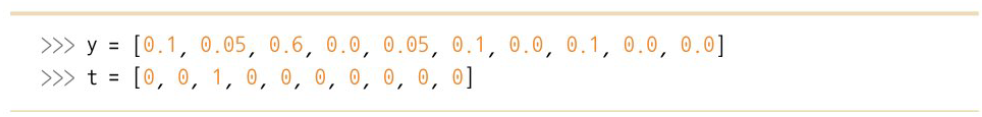

: 이 배열들의 원소는 첫 번째 인덱스부터 순서대로 숫자 0, 1, 2,...일 때의 값임<br>
: 여기에서 신경망의 출력 $y$는 소프트맥스 함수의 출력임<br>
: 소프트맥스 함수의 출력은 확률로 해석할 수 있으므로, 이 예에서는 이미지가 0일 확률은 0.1, 1일 확률은 0.05, 2일 확률은 0.6이라고 해석 가능함<br>
: 정답 레이블인 t는 정답을 가리키는 위치의 원소는 1로, 그 외에는 0으로 표기함<br>
: 여기에서는 숫자 2에 해당하는 원소의 값이 1이므로 정답이 2임을 알 수 있음<br>
: 이처럼 한 원소만 1로 하고 그 외는 0으로 나타내는 표기법을 **원-핫 인코딩**이라 함

**오차제곱합**은 [식 4.1]과 같이 각 원소의 출력(추정 값)과 정답 레이블(참 값)의 차 $(y_k - t_k)$를 제곱한 후, 그 총합을 구함

In [76]:
import numpy as np

def sum_squares_error(y, t):
  return 0.5 * np.sum((y-t)**2)

#여기에서 인수 y와 t는 넘파이 배열임

In [77]:
# 정답은 2
t=[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

# 예1: 2일 확률이 가장 높다고 추정함(0.6)
y=[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

np.float64(0.09750000000000003)

In [78]:
# 예2: 7일 확률이 가장 높다고 추정함(0.6)
y=[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
sum_squares_error(np.array(y), np.array(t))

np.float64(0.5975)

- 위 실험의 결과로 첫 번째 예의 손실 함수 쪽 출력이 작으며 정답 레이블과의 오차도 작다는 사실을 알 수 있음
- 즉, 오차제곱합 기준으로는 첫 번째 추정 결과가 (오차가 더 작으니) 정답에 더 가까울 것으로 판단할 수 있음

### 4.2.2 교차 엔트로피 오차

또 다른 손실 함수로서 **교차 엔트로피 오차(cross entropy error, CEE)**도 자주 이용함<br>
$E = - Σ_k t_k log y_k$
- $log$는 밑이 $e$인 자연로그 $(log_e)$
- $y_k$는 신경망의 출력
- $t_k$는 정답 레이블, 이는 정답에 해당하는 인덱스의 원소만 1이고 나머지는 0임(원-핫 인코딩).

[식 4-2]는 실질적으로 정답일 때의 추정($t_k$가 1일 때의 $y_k$)의 자연로그를 계산하는 식이 됨<br>
예를 들어, 정답 레이블은 2가 정답이라 하고 이때의 신경망 출력이 0.6이라면 교차 엔트로피 오차는 $-log 0.6 = 0.51$이 됨<br>
또한, 같은 조건에서 신경망 출력이 0.1이라면 $-log0.1 = 2.30$이 됨<br>
즉, 교차 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 됨<br>

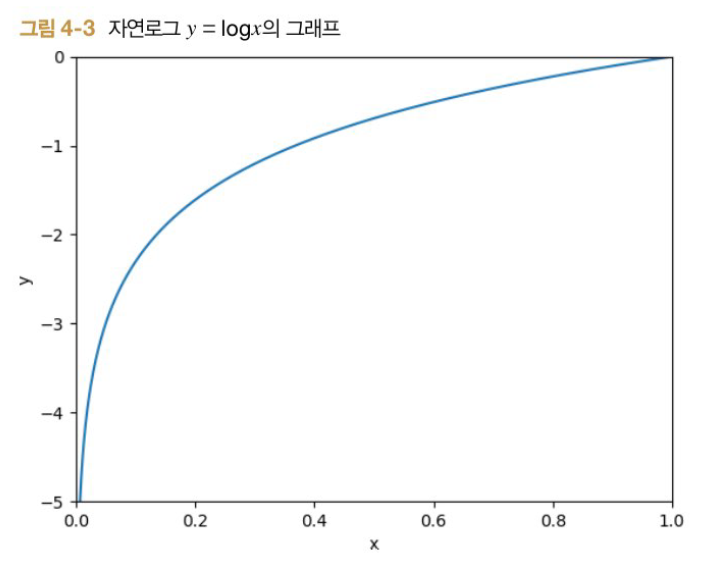

- 위 그림에서 보이듯, $x$가 1일 때 $y$는 0이 되고 $x$가 0에 가까워질수록 $y$의 값은 점점 작아짐
- [식 4.2]도 마찬가지로 정답에 해당하는 출력이 커질수록 0에 다가가다가, 그 출력이 1일 때 0이 됨. 반대로 정답일 때의 출력이 작아질수록 오차는 커짐

In [79]:
def cross_entropy_error(y, t):
  delta=1e-7
  return -np.sum(t*np.log(y+delta))

# y와 t는 넘파이 배열
# 마지막 줄: np.log() 함수에 0을 입력하면 마이너스 무한대를 뜻하는 -inf가 되어 더 이상 계산을 진행할 수 없게 되기 때문에 delta를 더했음
#즉, 아주 작은 값을 더해서 절대 0이 되지 않도록, 마이너스 무한대가 발생하지 않도록 한 것임

In [80]:
t=[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
y=[0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

np.float64(0.510825457099338)

In [81]:
y=[0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

np.float64(2.302584092994546)

- 첫 번째 예는 정답일 때의 출력이 0.6인 경우로, 이때의 교차 엔트로피 오차는 약 0.51임
- 그 다음은 정답일 때의 출력이 (더 낮은) 0.1인 경우로, 이때의 교차 엔트로피 오차는 무려 2.3임.
- 즉, 결과(오차 값)가 더 작은 첫 번째 추정이 정답일 가능성이 높다고 판단하였고, 이는 앞서 오차제곱합의 판단과 일치함

### 4.2.3 미니배치 학습

머신러닝 문제는 training data를 사용해 학습함
- training data에 대한 손실 함수의 값을 구하고, 그 값을 최대한 줄여주는 매개변수를 찾아냄
- 이렇게 하려면 모든 훈련 데이터를 대상으로 손실 함수 값을 구해야 함
- 즉, 훈련 데이터가 100개 있으면 그로부터 계산한 100개의 손실 함수 값들의 합을 지표로 삼는 것임

training data 모두에 대한 손실 함수의 합을 구하는 방법을 살펴봄<br>
예를 들어, 교차 엔트로피 오차는[식 4.3]처럼 됨<br>

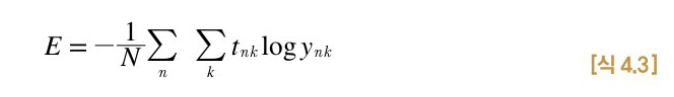

- 데이터가 $N$개라면 $t_{nk}$는 $n$번째 데이터의 $k$번째 값을 의미함
- $y_{nk}$는 신경망의 출력
- $t_{nk}$는 정답 레이블

*식 4.3은 데이터 하나에 대한 손실 함수인 [식 4.2]를 단순히 $N$개의 데이터로 확장했을 뿐임*

- 다만, 마지막에 $N$으로 나누어 정규화하고 있음 (즉, '평균 손실 함수'를 구하고 있음).
- 평균을 구해 사용하면 훈련 데이터 개수와 관계없이 언제든 통일된 지표를 얻을 수 있음.
- 그러나, 엄청나게 많은 양의 데이터를 대상으로 일일이 손실 함수를 계산하는 것은 현실적이지 못함.
- 따라서, 데이터의 일부를 추려 전체의 '근사치'로 이용할 수 있음. 신경망 학습에서도 training data로부터 일부만 골라 학습을 수행함

이 일부를 **미니배치**라고 함


In [82]:
#미니배치 학습 구현
#즉, 훈련 데이터에서 지정한 수의 데이터를 무작위로 골라 내는 코드

import sys, os
# sample_data 경로 추가
sys.path.append(os.path.join(os.getcwd(), 'sample_data'))
from sample_data.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
  load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000,)


In [83]:
#위에서 불러온 훈련 데이터에서 무작위로 10장만 빼내려면, np.random.choice() 함수 사용

train_size=x_train.shape[0]
batch_size=10
batch_mask=np.random.choice(train_size, batch_size)
x_batch=x_train[batch_mask]
t_batch=t_train[batch_mask]

In [84]:
#np.random.choice()로는 지정한 범위의 수 중에서 무작위로 원하는 개수만 꺼낼 수 있음

np.random.choice(60000,10)
#출력으로 나온 배열을 미니배치로 뽑아 낼 데이터의 인덱스로 사용하면 됨

array([24236, 48534, 49006, 21206, 30144, 57291, 45208, 10295, 46730,
       45731])

*무작위로 선택한 이 인덱스를 사용해 미니배치를 뽑아내기만 하면 됨. 손실 함수도 이 미니배치로 계산하면 됨.*

###4.2.4 (배치용) 교차 엔트로피 오차 구현하기
미니배치 같은 배치 데이터를 지원하는 교차 엔트로피 오차는 교차 엔트로피 오차(데이터를 하나씩 처리하는 구현)를 조금만 바꿔주면 됨

*여기에서는 데이터가 하나인 경우와 데이터가 배치로 묶여 입력될 경우 모두를 처리할 수 있도록 구현함*

In [85]:
def cross_entropy_error(y,t):
  if y.ndim==1:
    t=t.reshape(1, t.size)
    y=y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y+1e-7))/batch_size

#y는 신경망의 출력
#t는 정답 레이블
#y가 1차원이라면, 즉 데이터 하나당 교차 엔트로피 오차를 구하는 경우는 reshape로 데이터의 형상을 바꿔줌
#배치의 크기로 나눠 정규화하고, 이미지 1장당 평균의 교차 엔트로피 오차를 계산함

In [86]:
#정답 레이블이 원-핫 인코딩이 아니라 '2'나 '7' 등의 숫자 레이블로 주어졌을 때의 교차 엔트로피 오차 구현법

def cross_entropy_error(y, t):
  if y.ndim == 1:
    t=t.reshape(1, t.size)
    y=y.reshape(1, y.size)

  batch_size=y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

#해당 구현에서는 원-핫 인코딩일 때 t가 0인 원소는 교차 엔트로피 오차도 0이므로, 그 계산은 무시해도 좋다는 것이 핵심
#즉, 정답에 해당하는 신경망의 출력만으로 교차 엔트로피 오차를 계산할 수 있음
#따라서, 원-핫 인코딩 시 t*np.log(y) 였던 부분을 레이블 표현할 때는 np.log(y[np.arange(batch_size), t])로 구현함

**np.log(y[np.arange(batch_size), t])**

- np.arange(batch_size)는 0부터 batch_size -1 까지 배열을 생성함.
- t에는 레이블이 저장되어 있으므로, y[np.arange(batch_size), t]는 각 데이터의 정답 레이블에해당하는 신경망의 출력을 추출함

###4.2.5 왜 손실 함수를 설정하는가?

**왜 손실 함수를 사용해야 하는가?**
- 신경망 학습에서는 최적의 매개변수(가중치와 편향)을 탐색할 때 손실 함수의 값을 가능한 작게 하는 매개변수 값을 찾음
- 이때, 매개변수의 미분(기울기)을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복함
- 가중치 매개변수의 손실 함수의 미분이란, '가중치 매개변수의 값을 아주 조금 변화시켰을 때, 손실 함수가 어떻게 변하냐'라는 의미임
- 만약 이 미분 값이 음수면 그 가중치 매개변수를 양의 방향으로 변화시켜 손실 함수의 값을 줄일 수 있음
- 그러나, 미분 값이 0이면 가중치 매개변수를 어느 쪽으로 움직여도 손실 함수의 값은 줄어들지 않음. 이때, 가중치 매개변수의 갱신이 멈추게 됨.

**신경망을 학습할 때 정확도를 지표로 삼아서는 안됨. 왜냐하면, 매개변수의 미분이 대부분의 장소에서 0이 되기 때문**
- 매개변수를 약간만 조정해서는 정확도가 개선되지 않고 일정하게 유지됨
- 혹여, 정확도가 개선된다 하더라도 그 값은 연속적인 변화보다는 불연속적인 값으로 바뀌어버림

**손실 함수를 지표로 삼는다면?**
- 매개변수의 값이 조금 변하면, 그에 반응하여 손실 함수의 값도 연속적으로 변화함

정확도는 매개변수의 미소한 변화에는 거의 반응을 보이지 않고, 반응이 있더라도 그 값이 불연속적으로 갑자기 변화함.<br>
이는 '계단 함수'를 활성화 함수로 사용하지 않는 이유와 동일한 이유임<br>
만약 활성화 함수로 계단 함수를 사용하면 지금까지 설명한 내용과 같은 이유로 신경망 학습이 잘 이뤄지지 않음<br>
계단 함수의 미분은 [그림 4-4]와 같이 대부분의 장소(0 이외의 곳)에서 0임<br>
그 결과 계단 함수를 이용하면 손실 함수를 지표로 삼는 게 아무 의미가 없게 됨<br>
매개변수의 작은 변화가 주는 파장을 계단 함수가 말살하여 손실 함수의 값에는 아무런 변화가 나타나지 않기 때문.

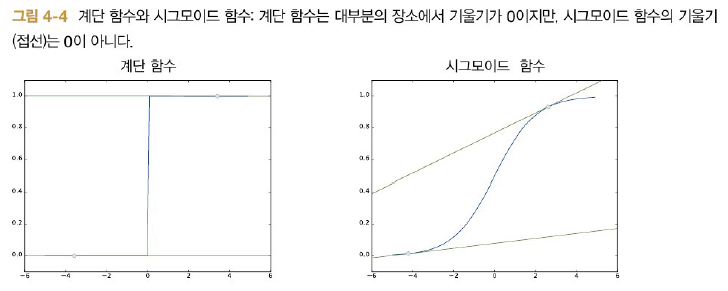

계단 함수는 한순간만 변화를 일으키지만, 시그모이드 함수의 미분(접선)은 [그림 4-4]와 같이 출력 (세로축의 값)이 연속적으로 변하고 곡선의 기울기도 연속적으로 변함.<br>
즉, 시그모이드 함수의 미분은 어느 장소라도 0이 되지는 않음.<br>
이는 신경망 학습에서 중요한 성질로, **기울기가 0이 되지 않는 덕분에** 신경망이 올바르게 학습할 수 있는 것임.

##4.3 수치 미분
경사법에서는 기울기(경사) 값을 기준으로 나아갈 방향을 정함.<br>

###4.3.1 미분
미분은 **특정 순간**의 변화량을 의미함<br>
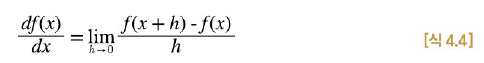

[식 4.4]는 함수의 미분을 나타낸 식임<br>
좌변은 $f(x)$의 $x$에 대한 미분($x$에 대한 $f(x)$의 변화량)을 나타내는 기호임<br>
결국 $x$의 '작은 변화'가 함수 $f(x)$를 얼마나 변화시키느냐를 의미함<br>
이때 시간의 작은 변화, 즉 시간을 뜻하는 $h$를 한없이 0에 가깝게 한다는 의미를 $\lim\limits_{h \rightarrow 0}$로 나타냄

In [87]:
#함수를 미분하는 계산 구현
#식 4.4를 그대로 구현하려면 h에 작은 값을 대입해 다음과 같이 구현할 수 있음
#해당 구현은 나쁜 구현의 예

def numerical_diff(f, x):
  h=1e-50
  return (f(x+h) - f(x)) / h

- 함수 f와 함수 f에 넘길 인수 x라는 두 인수를 받음
- h에 가급적 작은 값을 대입하고 싶었기에 1e-50이라는 작은 값을 이용함
- 하지만, 위와 같이 구현할 경우 **반올림 오차**라는 문제를 일으킴
- 반올림 오차는 작은 값이 생략되어 최종 계산 결과에 오차가 생기게 함
- 이를 방지하고자 미세한 값 h로 $10^{-4}$을 사용함.

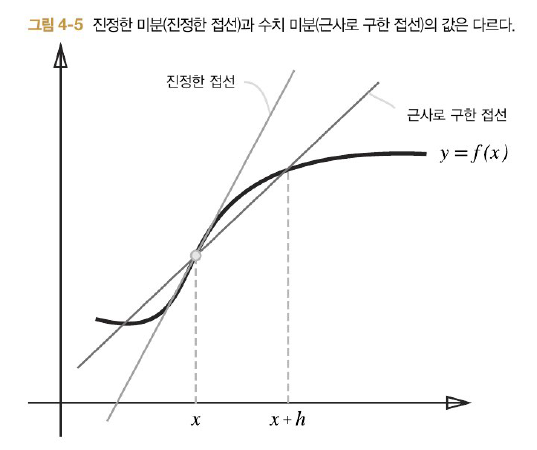

- [그림 4-5]와 같이 진정한 미분은 $x$ 위치의 함수의 기울기(접선)에 해당하나, 위와 같이 구현했을 때의 미분은 $(x+h)$와 $x$ 사이의 기울기에 해당함.
- 이 차이는 $h$를 무한히 0으로 좁히는 것이 불가능해 생기는 한계임
- [그림 4-5]와 같이 수치 미분에는 오차가 포함됨
- 이 오차를 줄이기 위해 $(x+h)$와 $(x-h)$일 때의 함수 $f$의 차분을 계산하는 방법을 쓰기도 함
- 이 차분은 $x$을 중심으로 그 전후의 차분을 계산한다는 의미에서 **중심 차분** 혹은 **중앙 차분**이라 함.
- 이때, $(x+h)$와 $x$의 차분은 **전방 차분**이라 함.

In [88]:
#이상의 두 개선점을 적용해 수치 미분을 다시 구현

def numerical_diff(f, x):
  h=1e-4
  return (f(x+h) - f(x-h)) / (2*h)

- 아주 작은 차분으로 미분하는 것: **수치 미분**
- 수식을 전개해 미분하는 것은 '해석적 해' 또는 '해석적으로 미분하다' 라고 표현함 (즉, 수학 시간에 배우던 그 미분을 의미함)

###4.3.2 수치 미분의 예

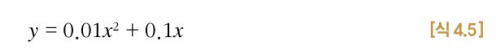

In [89]:
#[식 4.5]을 파이썬으로 구현하기

def function_1(x):
  return 0.01*x**2 + 0.1*x

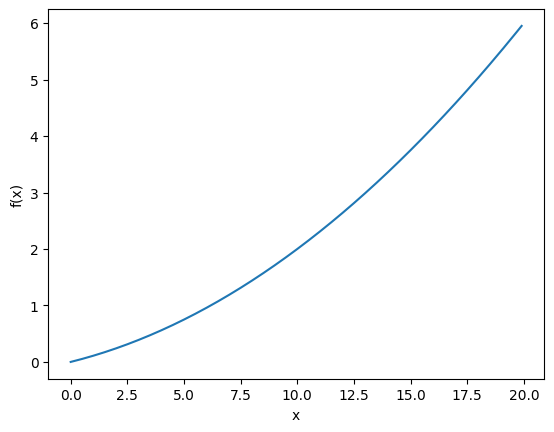

In [90]:
import numpy as np
import matplotlib.pylab as plt

x=np.arange(0.0, 20.0, 0.1) #0에서 20까지 0.1 간격의 배열 x을 만듦
y=function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [91]:
#x=5일 때와 10일 때 이 함수의 미분을 계산

numerical_diff(function_1, 5)

0.1999999999990898

In [92]:
numerical_diff(function_1, 10)

0.2999999999986347

- 위와 같이 계산한 미분 값이 $x$에 대한 $f(x)$의 변화량을 의미함(즉, 함수의 기울기)
- 아래의 그림은 위에서 구한 수치 미분 값을 기울기로 하는 직선을 그린 것임
- 해당 그림은 함수의 접선에 해당함을 확인할 수 있음

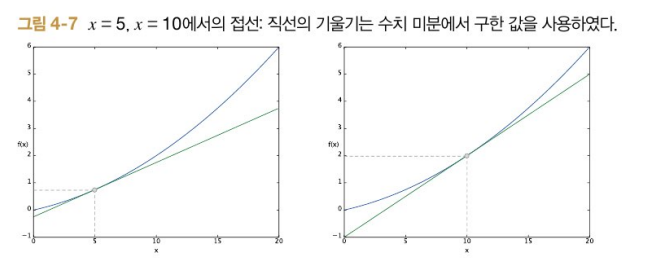

###4.3.3 편미분
아래의 식은 인수들의 제곱 합을 계산하지만, 앞의 예시와 달리 변수가 2개임을 주의해야 함<br>
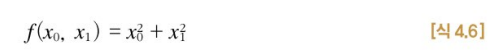

In [93]:
#[식 4.6]을 파이썬으로 구현했을 때

def function_2(x):
  return x[0]**2 + x[1]**2

- 인수 $x$는 넘파이 배열이라고 가정함
- 위 코드는 넘파이 배열의 각 원소를 제곱하고 그 합을 구함
- 아래는 해당 함수를 그래프로 그린 것임

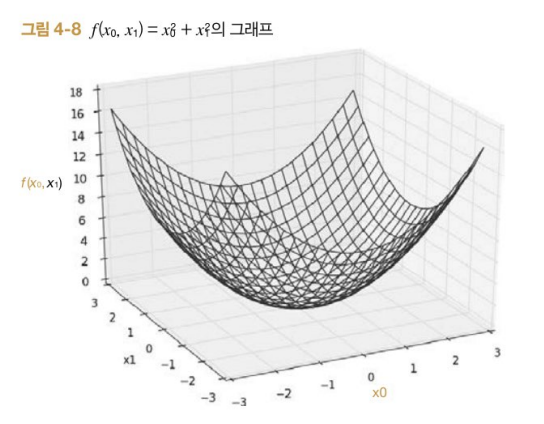

- 변수가 2개라는 것은 '어느 변수에 대한 미분이냐'를 구별해야 함
- 이와 같이 변수가 여럿인 함수에 대한 미분을 **편미분**이라고 함

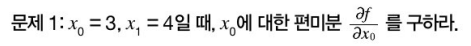

In [94]:
def function_tmp1(x0):
  return x0*x0 + 4.0**2.0

numerical_diff(function_tmp1, 3.0)

6.00000000000378

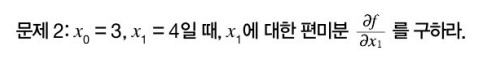

In [95]:
def function_tmp2(x1):
  return 3.0**2.0 + x1*x1

numerical_diff(function_tmp2, 4.0)

7.999999999999119

위와 같은 문제들은 변수가 하나인 함수를 정의하고, 그 함수를 미분하는 형태로 구현하여 해결함<br>
- 편미분은 변수가 하나인 미분과 마찬가지로 특정 장소의 기울기를 구함.
- 단, 여러 변수 중 목표 변수 하나에 초점을 맞추고 다른 변수는 값을 고정함
- 앞의 예시에서는 목표 변수를 제외한 나머지를 특정 값에 고정하기 위해 새로운 함수를 정의함
- 그리고 그 새로 정의한 함수에 대해 그동안 사용한 수치 미분 함수를 적용하여 편미분을 구함

##4.4 기울기
- 모든 변수의 편미분을 벡터로 정리한 것을 **기울기**라고 함

In [96]:
def numerical_gradient(f, x):
  h=1e-4
  grad=np.zeros_like(x) #x와 형상이 같은 배열을 생성

  for idx in range(x.size):
    tmp_val=x[idx]
    #f(x+h) 계산
    x[idx] = tmp_val+h
    fxh1=f(x)

    #f(x-h) 계산
    x[idx]=tmp_val-h
    fxh2=f(x)

    grad[idx]=(fxh1-fxh2)/(2*h)
    x[idx]=tmp_val #값 복원
  return grad

- numerical_gradient(f,x) 함수의 구현은 변수가 하나일 때의 수치 미분과 거의 비스시함
- np.zeros_like(x)는 x와 형상이 같고 그 원소가 모두 0인 배열을 생성함
- numerical_gradient(f,x) 함수의 인수인 f는 함수이고 x는 넘파이 배열이므로, 넘파이 배열 x의 각 원소에 대해 수치 미분을 구함

In [97]:
numerical_gradient(function_2, np.array([3.0, 4.0]))

array([6., 8.])

In [98]:
numerical_gradient(function_2, np.array([0.0, 2.0]))

array([0., 4.])

In [99]:
numerical_gradient(function_2, np.array([3.0, 0.0]))

array([6., 0.])

- $(x_0, x_1)$의 각 점에서의 기울기를 위와 같이 계산할 수 있음

기울기의 결과에 마이너스를 붙인 벡터를 그려보았음 <br>
기울기 그림은 [그림 4-9]처럼 방향을 가진 벡터(화살표)로 그려짐<br>

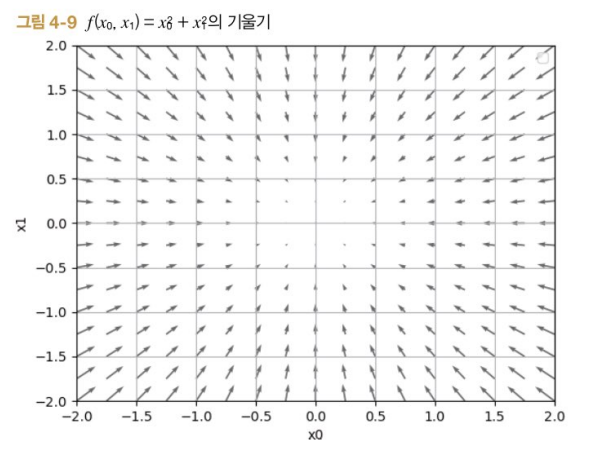

**기울기가 가리키는 쪽은 각 장소에서 함수의 출력 값을 가장 크게 줄이는 방향**

###4.4.1 경사법(경사 하강법)
- 신경망은 최적의 매개변수(가중치와 편향)을 학습 시에 찾아야 함
- 이때, 최적이란 손실 함수가 최솟값이 될 때의 매개변수를 의미함
- 그러나 일반적으로 매개변수 공간이 광대하여 어디가 최솟값이 되는 곳인지 짐작할 수 없음
- 이때, 기울기를 이용해 함수의 최솟값(또는 가능한 한 작은 값)을 찾으려는 방법이 **경사법**임

*주의할 점: 각 지점에서 함수의 값을 낮추는 방안을 제시하는 지표가 기울기임*

- 그러나 기울기가 가리키는 곳에 정말 함수의 최솟값이 있는지, 즉 그쪽이 정말로 나아갈 방향인지 보장은 불가능함.
- 즉, 기울어진 방향이 꼭 최솟값을 가리키는 것은 아니나, 그 방향으로 가야 함수의 값을 줄일 수 있음
- 그래서 최솟값이 되는 장소를 찾는 문제(아니면 가능한 한 작은 값이 되는 장소를 찾는 문제)에서는 기울기 정보를 단서로 나아갈 방향을 정해야 함.

**경사법**
- 경사법은 현 위치에서 기울어진 방향으로 일정 거리만큼 이동함
- 이동한 곳에서도 마찬가지로 기울기를 구하고, 또 그 기울어진 방향으로 나아가기를 반복함
- 이런 방식으로 함수의 값을 점차 줄이는 기법이 경사법임
- 최솟값을 찾을 경우 **경사 하강법**, 최댓값을 찾는 경우 **경사 상승법**이라고 함
- 경사법을 수식으로 나타내면 다음과 같음:

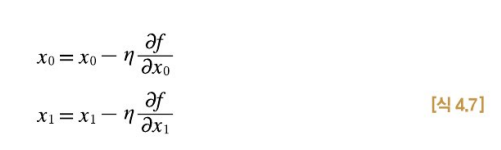

- [식 4.7]의 $η$ 기호는 갱신하는 양을 의미함. 이를 신경망 학습에서는 **학습률**이라고 함
- 한 번의 학습으로 얼마만큼 학습해야 할지, 즉 매개변수 값을 얼마나 갱신하느냐를 정하는 것이 학습률임
- [식 4.7]은 1회에 해당하는 갱신이고 이 단계를 반복함. 즉, 식처럼 변수의 값을 갱신하는 단계를 여러 번 반복하면서 서서히 함수의 값을 줄이는 것임
- 변수가 늘어나도 같은 식(각 변수의 편미분 값)으로 갱신할 수 있음
- 학습률 값은 0.01이나 0.001 등 미리 특정 값으로 정해두어야 함.
- 일반적으로 너무 작거나 크면 좋은 장소를 찾아갈 수 없기 때문
- 신경망 학습에서는 보통 이 학습률 값을 변경하면서 올바르게 학습하고 있는지를 확인하면서 진행함

In [100]:
#경사 하강법

def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x
  for i in range(step_num):
    grad=numerical_gradient(f, x)
    x-=lr * grad
  return x

- 인수 f는 최적화하려는 함수, init_x는 초깃값, lr는 learning rate을 의미하는 학습률, step_num은 경사법에 따른 반복 횟수
- 함수의 기울기는 numerical_gradient(f,x)로 구하고, 그 기울기에 학습률을 곱한 값으로 갱신하는 처리를 step_num번 반복함

*이 함수를 사용하면 함수의 극솟값을 구할 수 있고 잘하면 최솟값을 구할 수도 있음*

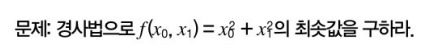

In [101]:
def function_2(x):
  return x[0]**2 + x[1]**2

init_x=np.array([-0.3, 4.0])
gradient_descent(function_2, init_x=init_x, lr=0.1, step_num=100)

array([-6.11110793e-11,  8.14814391e-10])

- 위에서는 초깃값을 (-3.0, 4.0)으로 설정한 후 경사법을 사용해 최솟값 탐색을 시작함
- 최종 결과는 거의 (0, 0)에 가까운 결과
- 실제로 진정한 최솟값은 (0, 0)이므로 경사법으로 거의 정확한 결과를 구현한 셈.

경사법을 사용한 이 갱신 과정을 그림으로 나타낸 것이 바로 [그림 4-10]임.
- 값이 가장 낮은 장소인 원점에 점차 가까워지고 있음
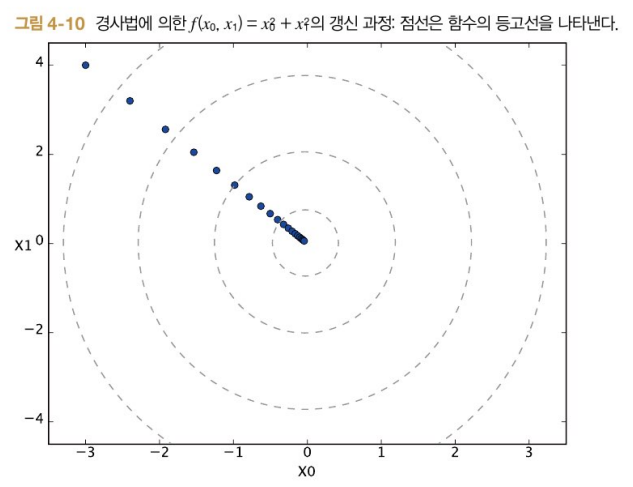

In [102]:
#학습률이 너무 큰 예: lr=10.0
init_x=np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=10.0, step_num=100)

array([-2.58983747e+13, -1.29524862e+12])

In [103]:
#학습률이 너무 작은 예: lr=1e-10
init_x=np.array([-3.0, 4.0])
gradient_descent(function_2, init_x=init_x, lr=1e-10, step_num=100)

array([-2.99999994,  3.99999992])

- 학습률이 너무 크면, 큰 값으로 발산
- 학습률이 너무 작으면, 거의 갱신되지 않은 채 끝남.

###4.4.2 신경망에서의 기울기
신경망 학습에서도 기울기를 구해야 함
- 기울기는 가중치 매개변수에 대한 손실 함수의 기울기
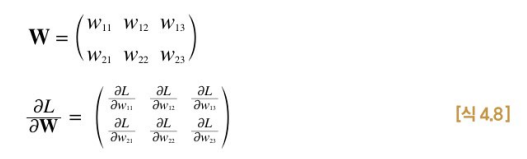

- 두 번째 수식의 각 원소는 각각의 원소에 관한 편미분임

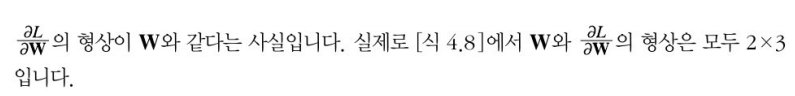

In [104]:
def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))

In [105]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

In [106]:
#간단한 신경망을 예로 들어 실제로 기울기를 구하는 코드

import numpy as np
import sys, os

class simpleNet:
  def __init__(self):
    self.W=np.random.randn(2,3) #정규분포로 초기화

  def predict(self, x):
    return np.dot(x, self.W)


  def loss(self, x, t):
    z=self.predict(x)
    y=softmax(z)
    loss=cross_entropy_error(y,t)

    return loss

- simpletNet 클래스는 형상이 2*3인 가중치 매개변수 하나를 인스턴스 변수로 가짐
- 메서드는 2개인데 하나는 예측을 수행하는 predict(x)이고, 다른 하나는 손실 함수의 값을 구하는 loss(x, t)임.
- 인수 x는 입력 데이터, t는 정답 레이블

In [107]:
net=simpleNet()
print(net.W) #가중치 매개변수

[[-0.46581316 -0.8118087   1.89950185]
 [-2.08614795  0.14054733 -0.69825424]]


In [108]:
x=np.array([0.6, 0.9])
p=net.predict(x)
print(p)

[-2.15702105 -0.36059262  0.51127229]


In [109]:
np.argmax(p) #최댓값의 인덱스

np.int64(2)

In [110]:
t=np.array([0, 0, 1]) #정답 레이블
net.loss(x, t)

np.float64(0.3971247471462309)

- 기울기를 구하려면, numerical_gradient(f, x)를 써서구하면 됨
- 여기서, 정의한 f(W) 함수의 인수 W는 임의로 만든 더미임
- numerical_gradient(f, x) 내부에서 f(x)를 실행하는데, 그와의 일관성을 위해 f(W)을 정의한 것임

In [111]:
def f(W):
  return net.loss(x, t)

In [112]:
def numerical_gradient(f, x):
    h = 1e-4  # 0.0001
    grad = np.zeros_like(x)

    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)  # f(x+h)

        x[idx] = tmp_val - h
        fxh2 = f(x)  # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val  # 값 복원
        it.iternext()

    return grad

In [113]:
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.0279806   0.1686693  -0.1966499 ]
 [ 0.04197091  0.25300395 -0.29497486]]


- numerical_gradient(f, x)의 인수 f는 함수, x는 함수 f의 인수
- net.W를 인수로 받아 손실 함수를 계산하는 새로운 함수 f를 정의했음
- 이 새로 정의한 함수를 numerical_gradient(f, x)에 넘김
- dW는 numerical_gradient(f, net.W)의 결과로, 그 형상은 2*3의 2차원 배열임
- dW의 내용을 보면, $\frac{\vartheta L}{\vartheta W}$의 $\frac{\vartheta L}{\vartheta ㅈ_{11}}$은 대략 0.2임
- 이는 $w_{11}$을 $h$만큼 늘리면 손실 함수의 값은 0.2h만큼 증가한다는 의미임

- 마찬가지로, $\frac{\vartheta L}{\vartheta w_{23}}$은 대략 -0.5이니, $w_{23}$을 h만큼 늘리면 손실 함수의 값은 0.5h만큼 감소함
- 손실 함수를 줄인다는 관점에서는 $w_{23}$은 양의 방향으로 갱신하고 $w_{11}$은 음의 방향으로 갱신해야 함을 알 수 있음
- 한 번에 갱신되는 양에는 $w_{23}$이 $w_{11}$보다 크게 기여한다는 사실도 알 수 있음

In [114]:
#아래의 방식처럼 구현하면 좀 더 간단함

f=lambda w: net.less(x,t)
dW=numerical_gradient(f, net.W)

AttributeError: 'simpleNet' object has no attribute 'less'

**신경망의 기울기를 구한 다음에는 경사법에따라 가중치 매개변수를 갱신하기만 하면 됨**

##4.5 학습 알고리즘 구현하기

####전체
신경망에는 적용 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 학습이라고 함. 신경망 학습은 다음과 같이 4단계로 수행됨

**1단계 - 미니배치**<br>
훈련 데이터 중 일부를 무작위로 가져옴. 이렇게 선별한 데이터를 미니배치라 하며, 그 미니배치의 손실 함수 값을 줄이는 것이 목표임

**2단계 - 기울기 산출** <br>
미니 배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구함. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시함

**3단계 - 매개변수 갱신** <br>
가중치 매개변수를 기울기 방향으로 아주 조금 갱신 함

**4단계 - 반복**<br>
1~3단계를 반복함



---

위의 방법은 **경사 하강법**으로 매개변수를 갱신하는 방법이며, 이때데이터를 미니배치로 무작위로 선정하기 때문에 **확률적 경사 하강법**이라고 부름.<br>


###4.5.1 2층 신경망 클래스 구현하기

In [115]:
# coding: utf-8
import numpy as np


def identity_function(x):
    return x


def step_function(x):
    return np.array(x > 0, dtype=np.int)


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)


def relu(x):
    return np.maximum(0, x)


def relu_grad(x):
    grad = np.zeros(x)
    grad[x>=0] = 1
    return grad


def softmax(x):
    if x.ndim == 2:
        x = x.T
        x = x - np.max(x, axis=0)
        y = np.exp(x) / np.sum(np.exp(x), axis=0)
        return y.T

    x = x - np.max(x) # 오버플로 대책
    return np.exp(x) / np.sum(np.exp(x))


def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)


def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)

    # 훈련 데이터가 원-핫 벡터라면 정답 레이블의 인덱스로 반환
    if t.size == y.size:
        t = t.argmax(axis=1)

    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size


def softmax_loss(X, t):
    y = softmax(X)
    return cross_entropy_error(y, t)

In [116]:
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y

    # x : 입력 데이터, t : 정답 레이블
    def loss(self, x, t):
        y = self.predict(x)

        return cross_entropy_error(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x : 입력 데이터, t : 정답 레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}

        batch_num = x.shape[0]

        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        # backward
        dy = (y - t) / batch_num  # ????
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)

        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

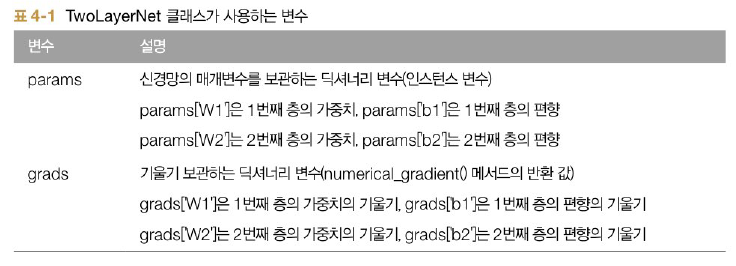

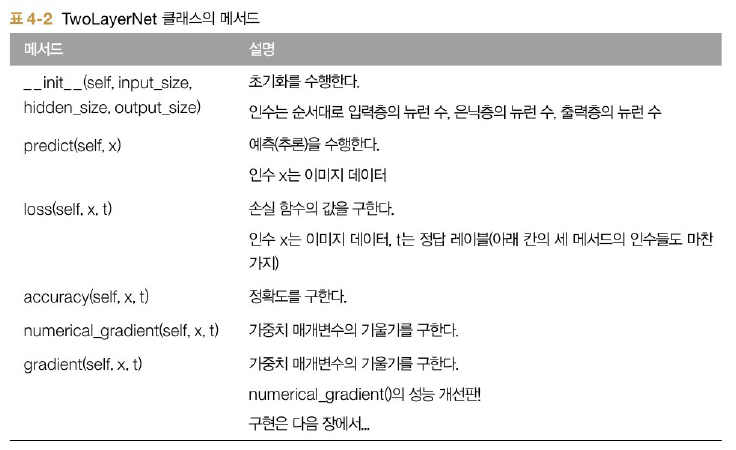

TwoLayerNet 클래스는 딕셔너리인 params와 grads를 인스턴스 변수로 가짐<br>
params 변수에는 가중치 매개변수가 저장됨

In [117]:
net=TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
net.params['W1'].shape #(784, 100)
net.params['b1'].shape #(100,)
net.params['W2'].shape #(100, 10)
net.params['b2'].shape #(10,)

(10,)

- 이와 같이 params 변수에는 이 신경망이필요한 매개변수가 모두 저장됨
- params 변수에 저장된 가중치 매개변수가 예측 처리(순방향 처리)에서 사용됨

In [118]:
x=np.random.rand(100, 784) #더미 입력 데이터(100장 분량)
y=net.predict(x)

- grads 변수에는 params 변수에 대응하는 각 매개변수의 기울기가 저장됨

In [ ]:
x=np.random.rand(100, 784) #더미 입력 데이터(100장 분량)
t=np.random.rand(100, 10) #더미 정답 레이블(100장 분량)

grads=net.numerical_gradient(x, t) #기울기 계산

grads['W1'].shape

**TwoLayerNet의 메서드들**<br>
- __init__(self, input_size, hidden_size, output_size) 메서드: 클래스를 초기화
- 인수는 순서대로 입력층의 뉴런 수, 은닉층의 뉴런 수, 출력층의 뉴런 수
- 초기화 메서드에서는 가중치 매개변수도 초기화함
- predict(self, x)와 accuracy(self, x, t): 신경망의 추론 처리와 거의 비슷
- loss(self, x, t): 손실 함수의 값을 계산하는 메서드 / predict()의 결과와 정답 레이블을 바탕으로 교차 엔트로피 오차를 구하도록 구현함
- numerical_gradient(self, x, t) 메서드: 각 매개변수의 기울기를 계산함 / 수치 미분 방식으로 각 매개변수의 손실 함수에 대한 기울기를 계산함
- gradient(self, x, t): 오차역전파법을 사용하여 기울기를 효율적이고 빠르게 계산함